
First scores are made from gotten variables (by 0.04391026496887207 secs, about 4.391026496887207e-05 for each creature)

Best score before optimization: -547.0352640610843
                                                                                                                                                                                                        
 The best found solution:
 [0.00449682 0.99550251]

 Objective function:
 -592.2771995604605

 Used generations: 10000
 Used time: 369 seconds


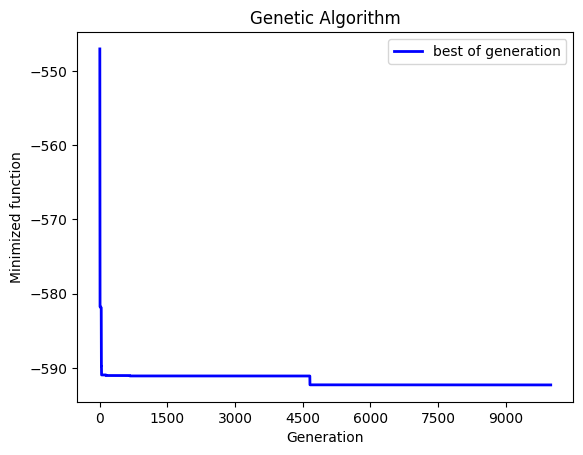

GAResult(last_generation=Generation(variables=array([[0.00449682, 0.99550251],
       [0.00449682, 0.99550251],
       [0.00449682, 0.99550251],
       ...,
       [0.96974338, 0.99550251],
       [0.97626073, 0.99550251],
       [0.98489855, 0.99550251]]), scores=array([-592.27719956, -592.27719956, -592.27719956, -592.27719956,
       -592.27719956, -592.27719956, -592.27719956, -592.27719956,
       -592.27719956, -592.27719956, -592.27719956, -592.27719956,
       -592.27719956, -592.27719956, -592.27719956, -592.27719956,
       -592.27719956, -592.27719956, -592.27719956, -592.27719956,
       -592.27719956, -592.27719956, -592.27719956, -592.27719956,
       -592.27719956, -592.27719956, -592.27719956, -592.27719956,
       -592.27719956, -592.27719956, -592.27719956, -592.27719956,
       -592.27719956, -592.27719956, -592.27719956, -592.27719956,
       -592.27719956, -592.27719956, -592.27719956, -592.27719956,
       -592.27719956, -592.27719956, -592.27719956, -592.27719956

In [114]:
import numpy as np
from geneticalgorithm2 import geneticalgorithm2 as ga
from geneticalgorithm2 import Generation
from OppOpPopInit import OppositionOperators

expected_returns = np.array([1.08, 1.75])
covariance_matrix = np.array([
    [6.32**2,0.37*9.73*6.23],
    [0.37*9.73*6.23,9.73**2]
])

def f(X):
    q=1
    pen = 0
    if np.sum(X) > 1:
        pen = 500+1000*np.sum(X)
    if np.sum(X) < 1:
        pen = 500+1000*np.sum(-X)
    return -(X.T@covariance_matrix@X-q*expected_returns.T@X)+pen

dim = 2
    
varbound = [(-1,1)]*dim


algorithm_param = {'max_num_iteration': 10000,
                   'population_size':200,
                   'mutation_probability':0.3,
                   'elit_ratio': 0.1,
                   'parents_portion': 0.3,
                   'selection_type': 'tournament',
                   'crossover_type':'shuffle',
                   'max_iteration_without_improv':None}

model = ga(function=f, 
           dimension=dim, 
           variable_type='real', 
           variable_boundaries=varbound,
           algorithm_parameters = algorithm_param)

# start generation
samples = np.random.uniform(-1, 1, (1000, dim))


model.run(
    no_plot = False, 
    start_generation=Generation(variables = samples, scores = None), 
    studEA=True
)

In [113]:
expected_returns = np.array([1.08, 1.75])
covariance_matrix = np.array([
    [6.32**2,0.37*9.73*6.23],
    [0.37*9.73*6.23,9.73**2]
])

def f(X):
    q=1
    pen = 0
    if np.sum(X) > 1:
        pen = 500+10000*np.sum(X)
    if np.sum(X) < 1:
        pen = 500+10000*np.sum(-X)
    return -(X.T@covariance_matrix@X-q*expected_returns.T@X)+pen
[f(np.array([0.01176871, 0.98822725])), f(np.array([0.801146, 0.198854]))]

0.99999596
1.0


[-9591.201621847682, -35.313093545618855]